In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load model data loaded in starter notebook

In [3]:
gdf = gpd.read_file('../datasets/geojson')
gdf.describe()

,populacja_,populacj_1,populacj_2,populacj_3,msw_2016_p,education_,closest_po
count,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000
mean,8.831603,8.344637,6.569781,7.091580,163.382699,9.085496,0.105915
std,9.073243,7.828296,6.144368,6.549458,109.608807,8.232596,0.132898
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.451639,0.000561
25%,3.000000,3.000000,2.000000,2.000000,88.000000,5.426141,0.042082
50%,6.000000,6.000000,5.000000,5.000000,143.000000,7.958630,0.071477
75%,12.000000,11.000000,9.000000,10.000000,218.000000,11.106151,0.117122
max,106.000000,79.000000,49.000000,66.000000,1269.000000,371.741350,1.926789


In [4]:
gdf['center'] = gdf.centroid

In [5]:
gdf.head()

,st_astext,populacja_,populacj_1,populacj_2,populacj_3,msw_2016_p,education_,closest_po,geometry,center
0,MULTIPOLYGON(((19.9565040681133 50.00918067433...,19,19,17,9,281,9.399644,0.093079,"POLYGON ((19.9564267646728 50.0091806743311, 1...",POINT (19.95544567430785 50.00894505389149)
1,MULTIPOLYGON(((19.9272599577811 50.06682772359...,3,0,2,17,41,14.341914,0.029664,"POLYGON ((19.9267050375255 50.0668277235919, 1...",POINT (19.92677892088003 50.06701593463123)
2,MULTIPOLYGON(((19.9319759854035 50.07793862466...,0,0,1,5,56,5.729100,0.019101,"POLYGON ((19.9319223340153 50.0779386246607, 1...",POINT (19.93177603911851 50.07817133734535)
3,MULTIPOLYGON(((20.0509611668009 50.07354064341...,7,3,4,4,100,9.807191,0.102686,"POLYGON ((20.050820028585 50.0735406434159, 20...",POINT (20.0504180998416 50.07337388834839)
4,MULTIPOLYGON(((20.0475199444994 50.07630613211...,9,7,7,2,174,9.370811,0.044320,"POLYGON ((20.0474672873805 50.076306132119, 20...",POINT (20.04722548816946 50.07637271112603)


In [6]:
gdf.keys()

Index(['st_astext', 'populacja_', 'populacj_1', 'populacj_2', 'populacj_3',
       'msw_2016_p', 'education_', 'closest_po', 'geometry', 'center'],
      dtype='object')

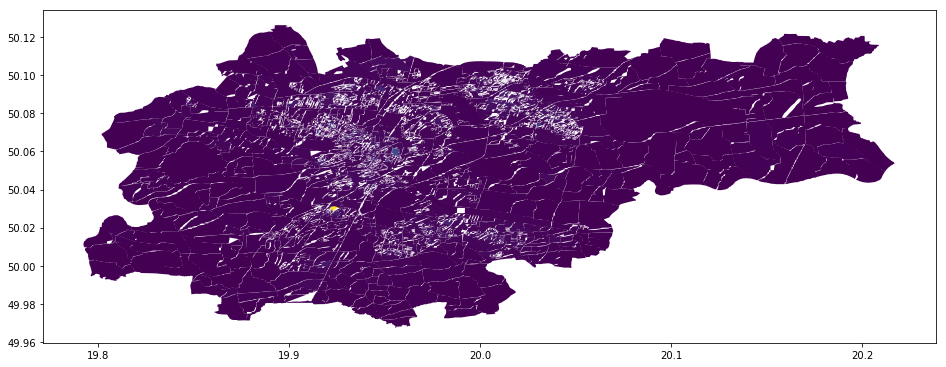

In [7]:
# plt.figure(figsize=(16, 16), dpi=100, facecolor='w', edgecolor='k')
gdf.plot(column='education_', figsize=(16,16))
plt.show()

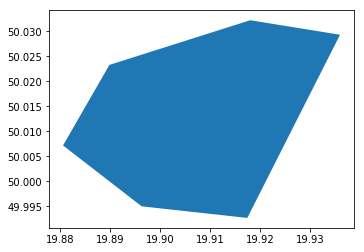

In [22]:
from shapely.geometry import Point, Polygon

filter_pts = [
    [50.00720051822555,19.880619061157176],
    [50.023305310107474,19.889888775512645],
    [50.03223783247384,19.918041241332958],
    [50.029336909961415,19.93599784604362],
    [49.99271183370883,19.917458417332682],
    [49.995029307046764,19.89634406796744],
]

filter_pts = [[filter_pts[i][1], filter_pts[i][0]] for i in range(len(filter_pts))]

poly = Polygon(filter_pts)
filter_gdf = gpd.GeoDataFrame([0], crs={"init": "epsg:4326"}, geometry=[poly])
filter_gdf.plot()
plt.show()

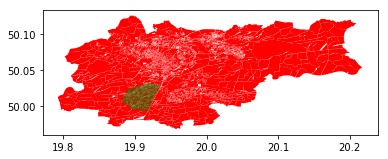

In [19]:
ax = gdf.plot(color='red');
ax= filter_gdf.plot(ax=ax, color='green', alpha=0.5);
plt.show()

In [34]:
# gdf.geometry[0]
# intersection = gpd.overlay(gdf, filter_gdf, how='union')  # NOT WORKING !!!!!

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

In [36]:
gdf.head()

,st_astext,populacja_,populacj_1,populacj_2,populacj_3,msw_2016_p,education_,closest_po,geometry,center
0,MULTIPOLYGON(((19.9565040681133 50.00918067433...,19,19,17,9,281,9.399644,0.093079,"POLYGON ((19.9564267646728 50.0091806743311, 1...",POINT (19.95544567430785 50.00894505389149)
1,MULTIPOLYGON(((19.9272599577811 50.06682772359...,3,0,2,17,41,14.341914,0.029664,"POLYGON ((19.9267050375255 50.0668277235919, 1...",POINT (19.92677892088003 50.06701593463123)
2,MULTIPOLYGON(((19.9319759854035 50.07793862466...,0,0,1,5,56,5.729100,0.019101,"POLYGON ((19.9319223340153 50.0779386246607, 1...",POINT (19.93177603911851 50.07817133734535)
3,MULTIPOLYGON(((20.0509611668009 50.07354064341...,7,3,4,4,100,9.807191,0.102686,"POLYGON ((20.050820028585 50.0735406434159, 20...",POINT (20.0504180998416 50.07337388834839)
4,MULTIPOLYGON(((20.0475199444994 50.07630613211...,9,7,7,2,174,9.370811,0.044320,"POLYGON ((20.0474672873805 50.076306132119, 20...",POINT (20.04722548816946 50.07637271112603)
